# Predicting Fire Area Damage

#### Student: Rodolfo Lerma

For this assignment, we will be using linear regresion to forecase fire area damage. We will leverage the [Forest Fires Data Set](https://archive.ics.uci.edu/ml/datasets/Forest+Fires) to solve this problem. Additional information regarding this work can be found [Cortez and Morais, 2007](http://www3.dsi.uminho.pt/pcortez/fires.pdf).

Attribute information:

   For more information, read [Cortez and Morais, 2007].

   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: "jan" to "dec" 
   4. day - day of the week: "mon" to "sun"
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 
   7. DC - DC index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
   (this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform). 

In [1]:
import pandas as pd
#Loading data and exploring first 5 rows
forestfires = pd.read_csv('forestfires.csv')
forestfires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [2]:
#Exploring the shape of the dataframe
forestfires.shape

(517, 13)

The dataset contains 13 columns and 517 rows.

In [3]:
#Datatypes on dataframe
forestfires.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

It is possible to see that the dataset is made of 11 numeric columns & 2 categorical ones (`month` & `day`)

Also as seen in the code above, there are 517 instances (data points/rows) of the data.

## Question 1.1: Using the [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method, provide the summary statistics of the data

In [4]:
#Exploring the summary statitics from the dataset
forestfires.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


Looking at the summary statistics for the variable `area` it is possible to notice the huge difference between the MAX and the MEAN, which could be an indication of `outliers`.

## Question 1.2: Apply log(area+1) to the data

In [5]:
import numpy as np
#Adding a column with the Area value transform using a Log transformation
forestfires['area_log'] = np.log(forestfires['area'] + 1)

In [6]:
#Exploring the data set with the new column
forestfires.head(2)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_log
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0


In [7]:
#Exploring the new column
forestfires['area_log'].describe()

count    517.000000
mean       1.111026
std        1.398436
min        0.000000
25%        0.000000
50%        0.418710
75%        2.024193
max        6.995620
Name: area_log, dtype: float64

## Question 2.1: Visually explore the data using pairplot.

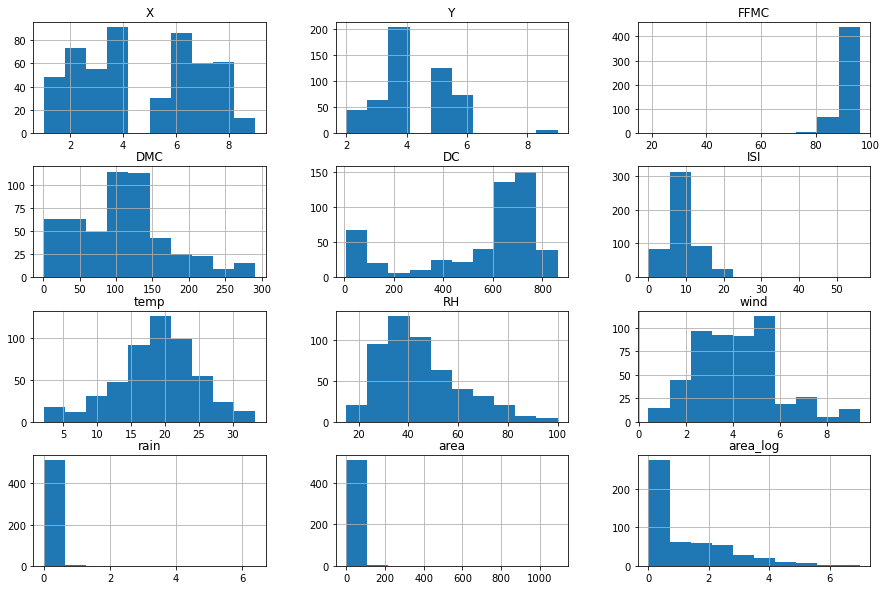

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Exploring distribution of the data available
forestfires.hist(figsize = (15,10))
plt.show()

### `Month` & `Day` distribution

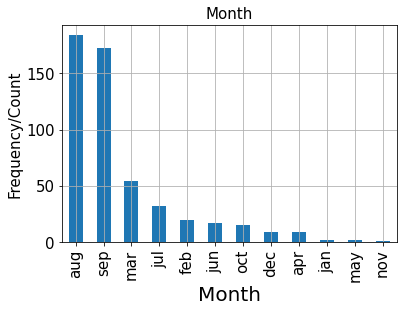

In [9]:
forestfires['month'].value_counts().plot(kind='bar')
plt.xlabel('Month', fontsize = 20)
plt.ylabel('Frequency/Count',fontsize = 15)
plt.title('Month', fontsize = 15)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

August and September are the 2 months with higher values, which aligns with the fact that these 2 months usually are the hottest/driest of the year in the US.

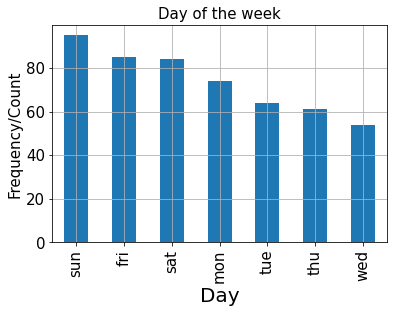

In [10]:
forestfires['day'].value_counts().plot(kind='bar')
plt.xlabel('Day', fontsize = 20)
plt.ylabel('Frequency/Count',fontsize = 15)
plt.title('Day of the week', fontsize = 15)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

It is possible to see that most of the fires occured during the weekend (not by much though), which could be an indication of human interaction as a possible reason for this fires.

### Target Variable (`Area` & `Area_log`)

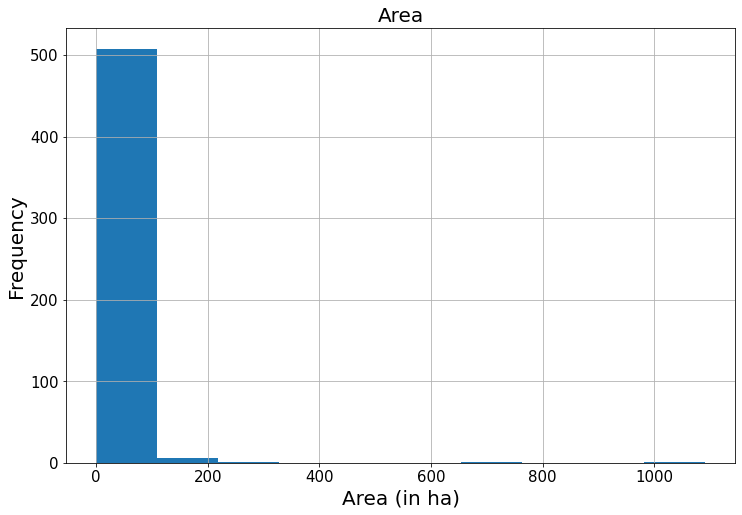

In [11]:
#Area Histogram
forestfires['area'].hist(figsize = (12,8))
plt.xlabel('Area (in ha)', fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.title('Area', fontsize = 20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

It is possible to notice that the distribution is sweked towards zero.

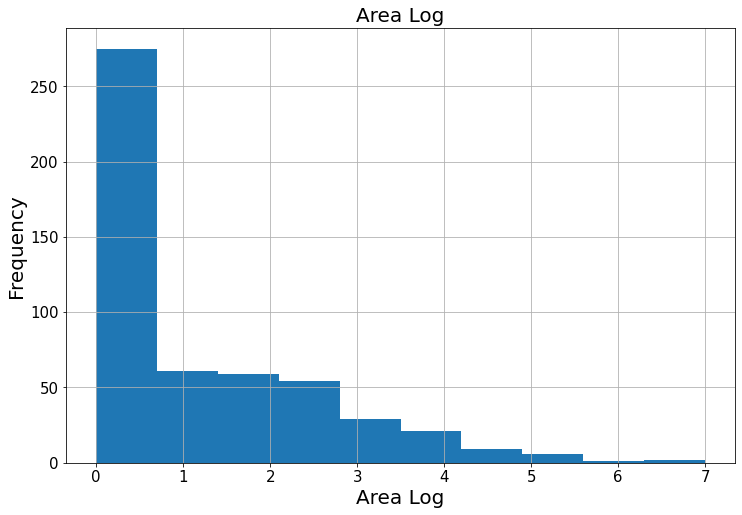

In [12]:
#Area Log Histogram
forestfires['area_log'].hist(figsize = (12,8))
plt.xlabel('Area Log', fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.title('Area Log', fontsize = 20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

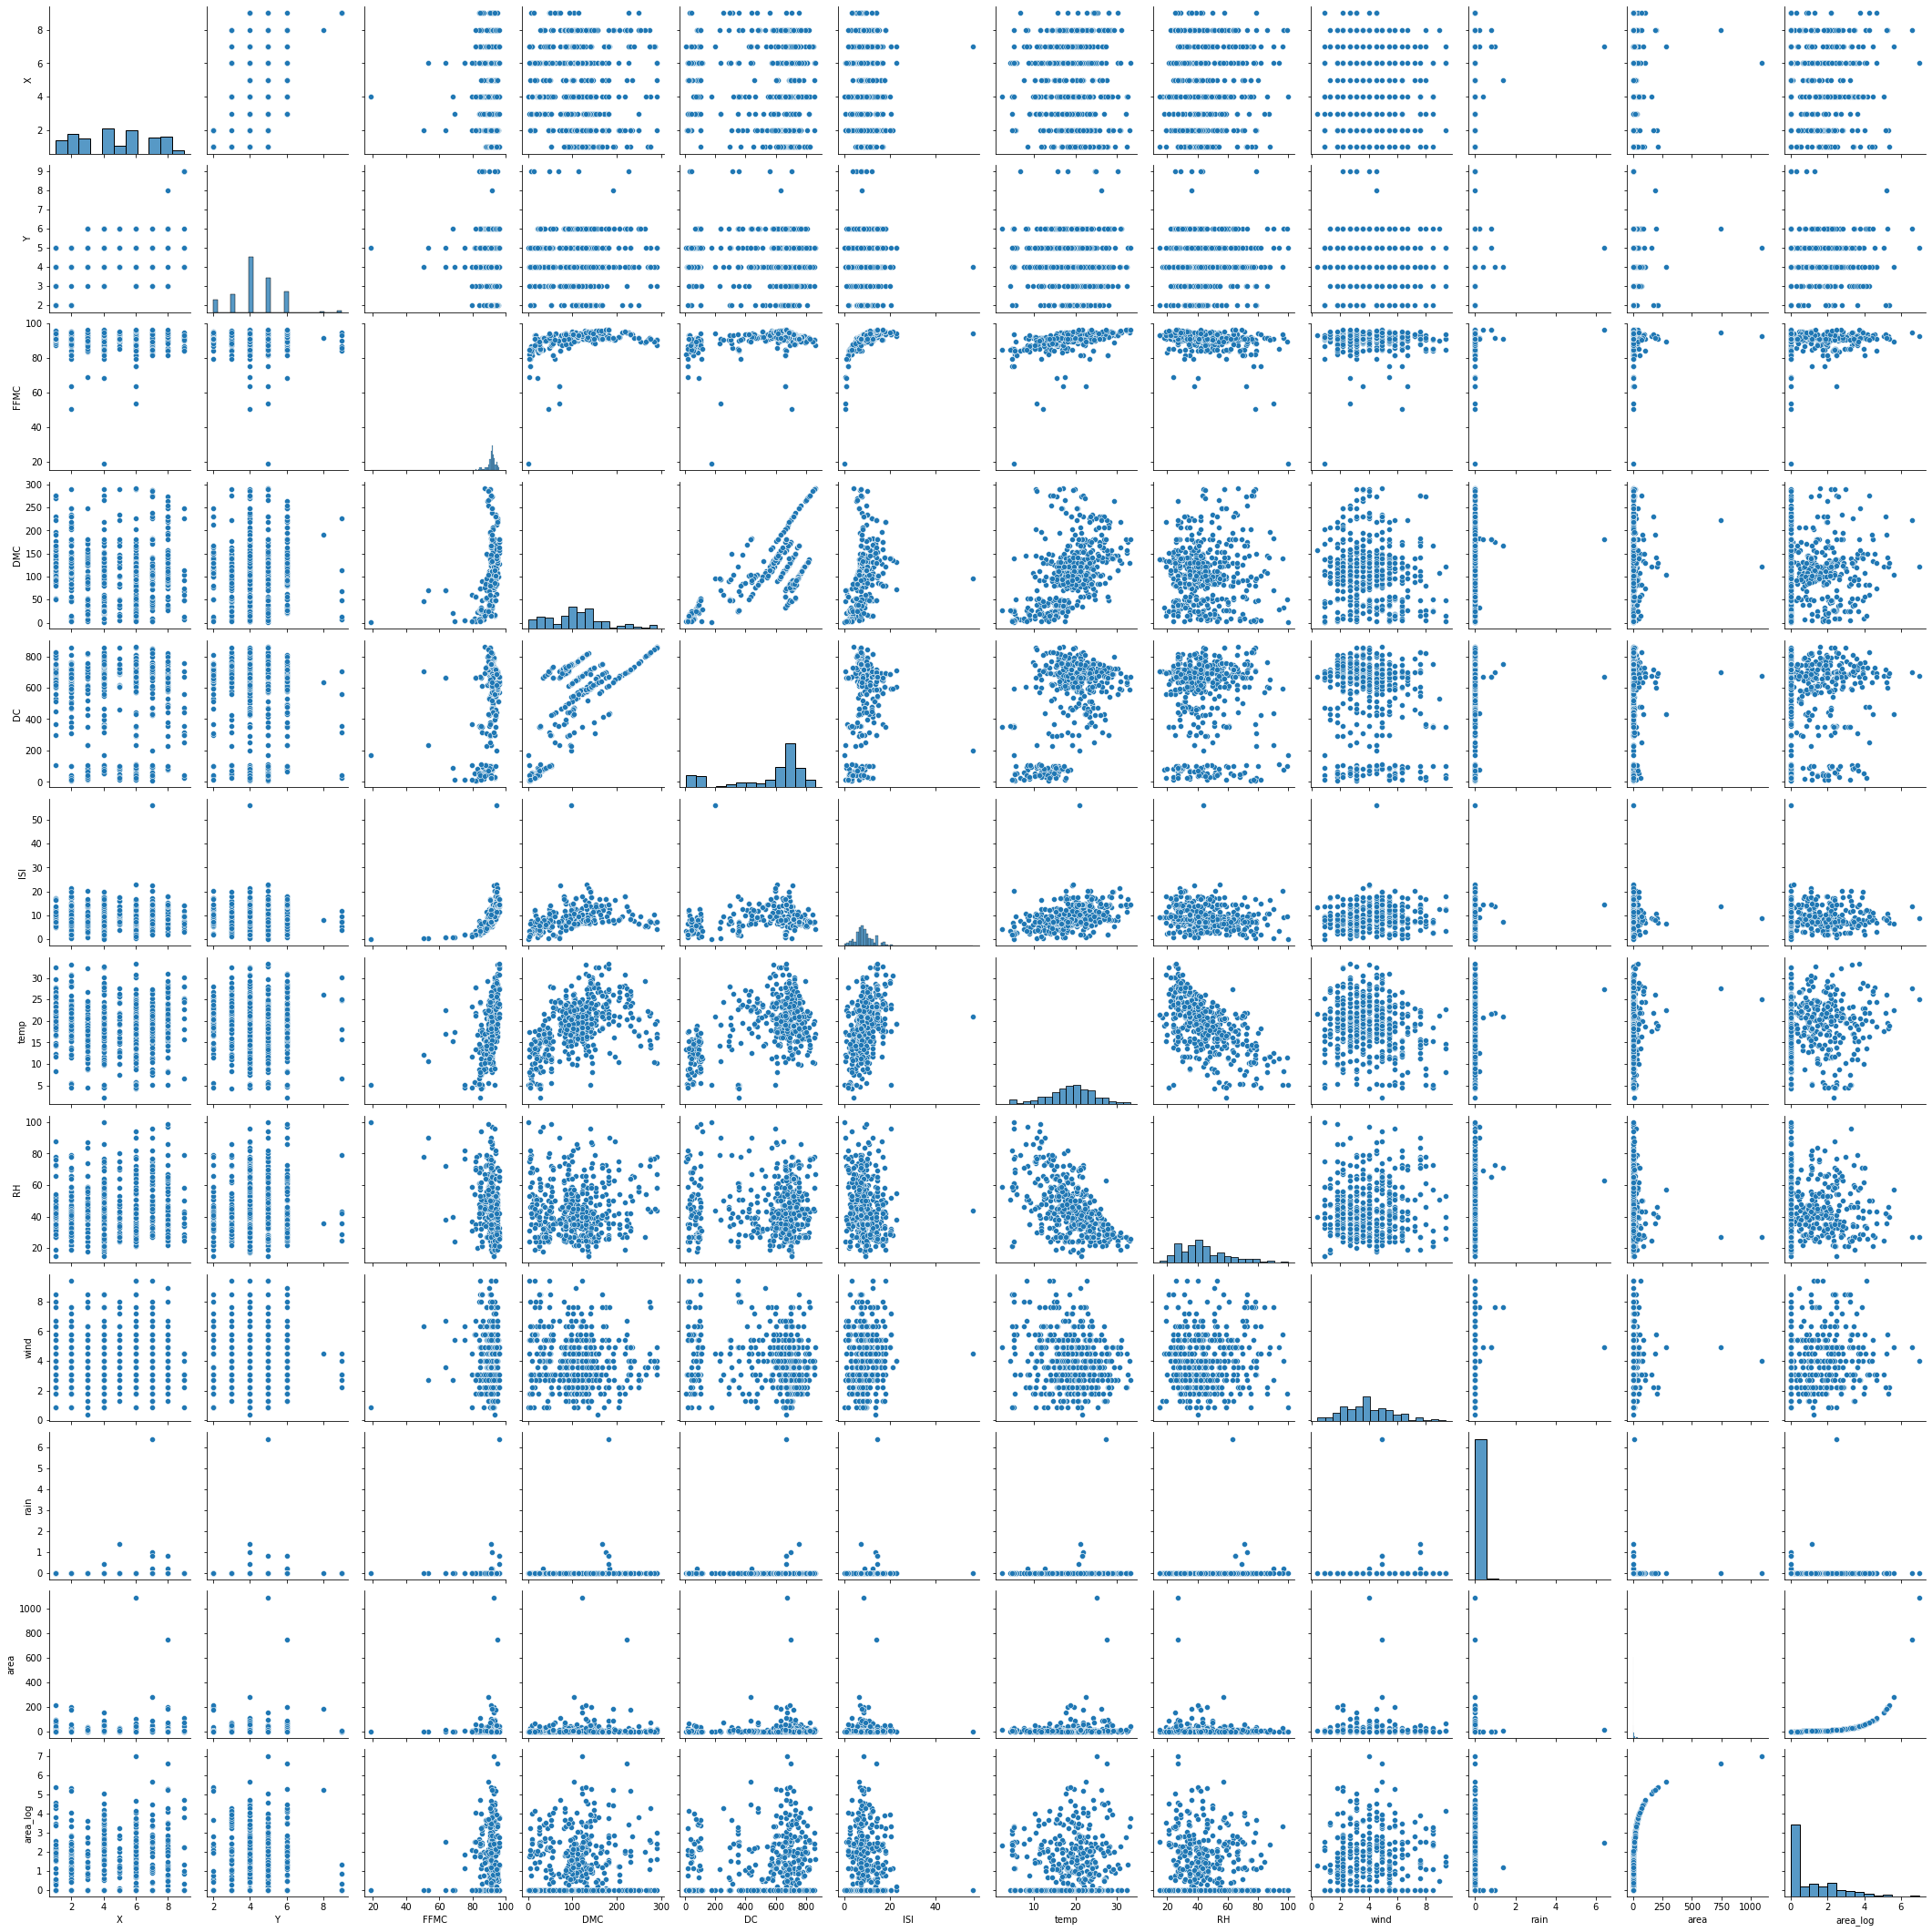

In [13]:
#Matrix scatter plot
sns.pairplot(forestfires)

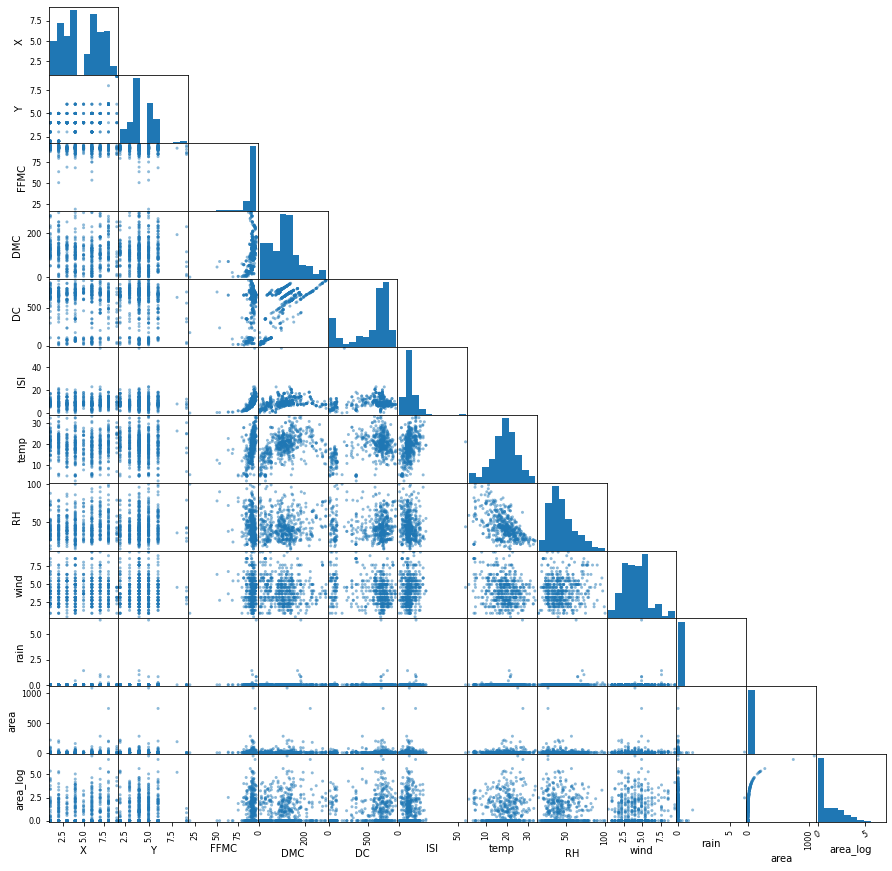

In [14]:
#Lower triangule matrix scatter plot
from pandas.plotting import scatter_matrix
axes = scatter_matrix(forestfires, figsize = (15,15),diagonal='hist', alpha=0.5)

for i in range(np.shape(axes)[0]):
    for j in range(np.shape(axes)[1]):
        if i < j:
            axes[i,j].set_visible(False)
            
plt.xticks(rotation=30)
plt.yticks(rotation=45)
plt.show()

Looking at the matrix scatter plot one can notice that for the `area` target variable it is better to use the `area_log` transformation to see any meaninful relationship.

In [15]:
#Dropping the 2 categorical variables
forestfires_numeric = forestfires.copy()
forestfires_numeric.drop(['month', 'day'], axis = 1, inplace = True)

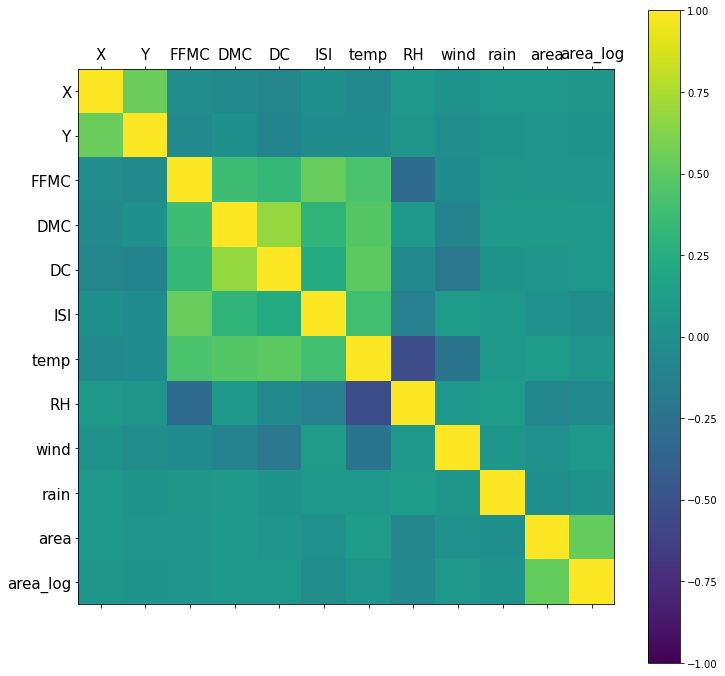

In [16]:
#Correlation plots for all the numerical features
correlations = forestfires_numeric.corr()
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,12,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(forestfires_numeric, fontsize = 15)
ax.set_yticklabels(forestfires_numeric, fontsize = 15)
plt.show()

Looking at the target varible (`area` and/or `area_log`), it seems that is poorly correlated to all the other features present on the data. But also it is possible to see the high correlation between some of the features, as an example `RH` (relative humidity) and `temp` that should be taken into account when working on the regression model.

## Question 2.2: Zoom in at the rain vs area by plotting the scatter plot. What do you conclude?

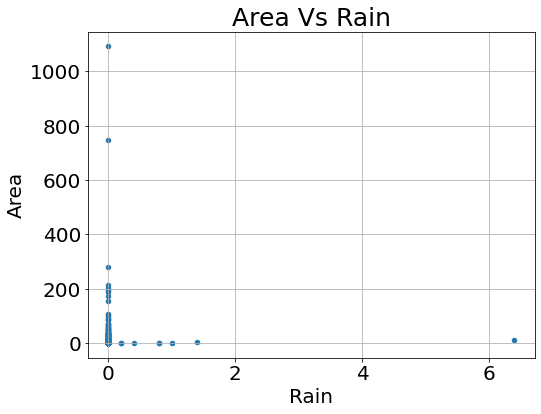

In [17]:
#Area Vs Rain
ax = plt.figure(figsize=(8, 6)).gca() # define axis
forestfires.plot.scatter(x = 'rain', y = 'area', ax = ax)
ax.set_title('Area Vs Rain', fontsize = 25) # Give the plot a main title
ax.set_ylabel('Area', fontsize = 20)# Set text for y axis
ax.set_xlabel('Rain', fontsize = 20)
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=20)
ax.grid(True)
plt.show()

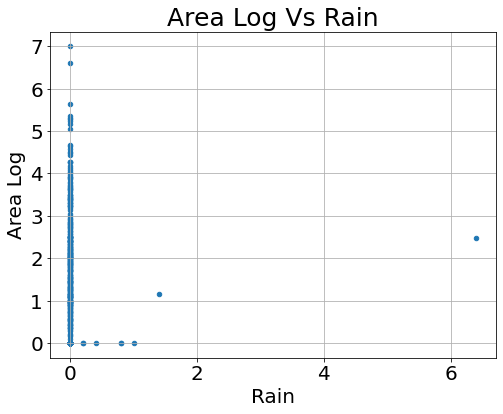

In [18]:
#Area Log Vs Rain
ax = plt.figure(figsize=(8, 6)).gca() # define axis
forestfires.plot.scatter(x = 'rain', y = 'area_log', ax = ax)
ax.set_title('Area Log Vs Rain', fontsize = 25) # Give the plot a main title
ax.set_ylabel('Area Log', fontsize = 20)# Set text for y axis
ax.set_xlabel('Rain', fontsize = 20)
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=20)
ax.grid(True)
plt.show()

There isn't many instances where it rains during the fire, but when it does, it limits the area spread given that we remove the two outlier points where rain is greater than 1mm.

In [19]:
#Some cleaning of the data (outliers) will be removed since we are interested in the typical market for the region.
FlagBad = (forestfires['rain'] > 1) #Boolean for values outside limits
FlagGood = ~FlagBad #Complement
forestfires = forestfires.loc[FlagGood] 

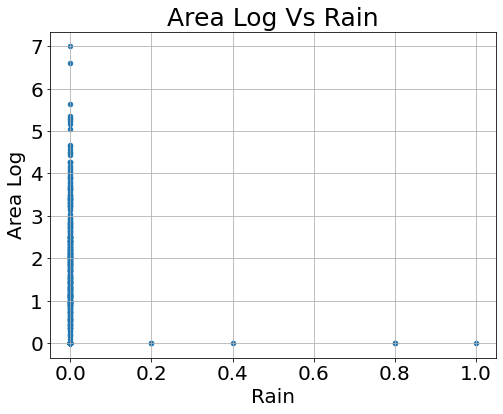

In [20]:
#Area Log Vs Rain (removing outliers)
ax = plt.figure(figsize=(8, 6)).gca() # define axis
forestfires.plot.scatter(x = 'rain', y = 'area_log', ax = ax)
ax.set_title('Area Log Vs Rain', fontsize = 25) # Give the plot a main title
ax.set_ylabel('Area Log', fontsize = 20)# Set text for y axis
ax.set_xlabel('Rain', fontsize = 20)
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=20)
ax.grid(True)
plt.show()

**As mentioned before, in all the instances when it rained is possible to see that the burned `area` was limited. Also another perspective is that days without rain are more likely to have fires (which makes sense).**

## Question 4.1: Develop a simple linear regression model, relating area with rain and wind only. Calculate the predict values based on test data.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [22]:
#Regression using rain & wind
attributes = forestfires[['rain', 'wind']]
y_output = forestfires['area_log']

In [23]:
# Scale the data (normalization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(attributes)
attributes = scaler.transform(attributes)

#### Splitting the data and training the model (rain & wind)

In [24]:
#Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(attributes, y_output, test_size=0.20, random_state=42)

In [25]:
#Getting the regression using sklearn
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()

# Fit the data(train the model)
multi_model = regression_model.fit(X_train, y_train)

# Predict
y_predicted = multi_model.predict(X_test)

#Coefficients from linear equation
print('Intercept: \n', multi_model.intercept_) # pull out intercept
print('Coefficients: \n', multi_model.coef_) # pull out coeffeicients

Intercept: 
 1.1104915589343414
Coefficients: 
 [-0.10902514  0.08074176]


In [26]:
#Getting the regression with statsmodels
import statsmodels.api as sm

Attributes = sm.add_constant(X_train) # adding a constant
multi_model = sm.OLS(y_train, Attributes).fit()

# Get slope (m) and y-intercept (b)
print('Intercept/Constant & Coefficients : {}'.format(multi_model.params))

Intercept/Constant & Coefficients : const    1.110492
x1      -0.109025
x2       0.080742
dtype: float64


Both options on the linear regression model.

## Question 4.2: Calculate the mean squared error of predict results.

In [27]:
print('\n Training: MSE & RMSE for:')
print('MSE: {}'.format(multi_model.mse_model))
print('RMSE: {}'.format(multi_model.rsquared))


 Training: MSE & RMSE for:
MSE: 3.1047007651982312
RMSE: 0.007845141023046898


In [28]:
from sklearn.metrics import mean_squared_error
import math

predictions = multi_model.predict(sm.add_constant(X_test)) 
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)

print('\n Testing: MSE & RMSE for:')
print('MSE: {}'.format(mse))
print('RMSE: {}'.format(rmse))


 Testing: MSE & RMSE for:
MSE: 2.04929650703845
RMSE: 1.4315364148489027


Looking at the results it is possible to notice the poor correlation.

C:\Users\rodol\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


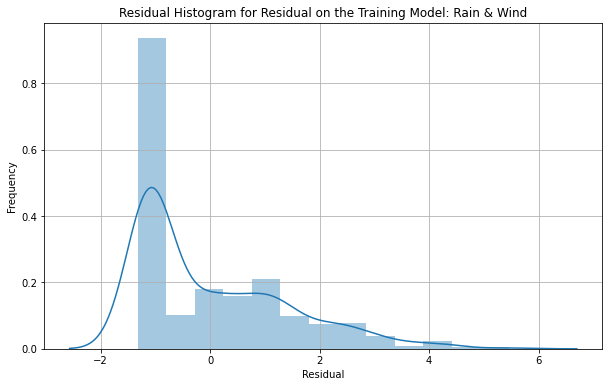

In [29]:
def histograms(a,b):
    plt.figure(figsize=(10, 6)).gca()
    sns.distplot(a.resid, hist=True)
    plt.grid(True)
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.title('Residual Histogram for ' + b)
    
histograms(multi_model, 'Residual on the Training Model: Rain & Wind')

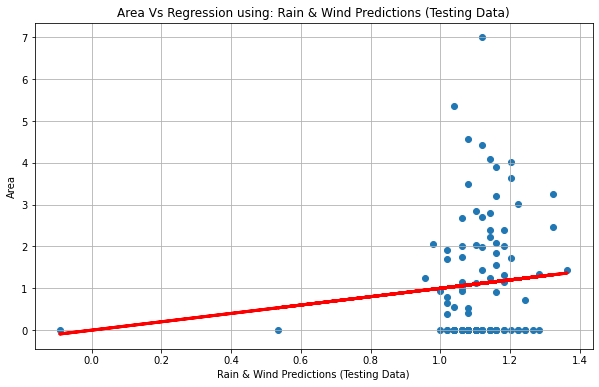

In [30]:
def scatters(a,b,c,d):
    plt.figure(figsize=(10, 6)).gca()
    plt.scatter(a, b)
    plt.plot(a, c, linewidth=3, color = 'red')
    plt.grid(True)
    plt.xlabel(d)
    plt.ylabel('Area')
    plt.title('Area Vs Regression using: ' + d)

scatters(predictions, y_test, predictions, 'Rain & Wind Predictions (Testing Data)')

## Question 5.1: Develop a linear regression model, relating area with all features. Calculate the predict values based on test data.

In [31]:
forestfires_all = pd.get_dummies(forestfires, columns = ['month', 'day'])
forestfires_all.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,1,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,1,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0


In [32]:
#Making a copy of the dataframe and dropping the target variables
forestfires_features = forestfires_all.copy()
forestfires_features.drop(['area_log', 'area'], axis = 1, inplace = True)
#Getting a list with the names of the features
columns = forestfires_features.columns.tolist()

In [33]:
#Regression using rain & wind
attributes_all = forestfires_features[columns]
y_output_all = forestfires['area_log']

#Normalization of the values
scaler_all = StandardScaler()
scaler_all.fit(attributes_all)
attributes_all = scaler_all.transform(attributes_all)

#### Splitting the data and training the model (All features)

In [34]:
#Split the data into training set and testing set
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(attributes_all, y_output_all, test_size=0.20, random_state=42)

In [35]:
#Getting the regression using sklearn

# Fit the data(train the model)
multi_model_all = regression_model.fit(X_train_all, y_train_all)

# Predict
y_predicted_all = multi_model_all.predict(X_test_all)

print('Coefficients from the Regression Model')
print('Intercept: \n', multi_model_all.intercept_) # pull out intercept
print('Coefficients: \n', multi_model_all.coef_) # pull out coeffeicients

Coefficients from the Regression Model
Intercept: 
 1.1096339838451221
Coefficients: 
 [ 1.69401717e-01 -4.13763394e-02  9.06479317e-02  2.72347038e-01
 -3.21442898e-01 -1.92862861e-02  2.13309498e-01  7.95457014e-02
  9.16016748e-02 -1.31413072e-01 -1.90818207e+12 -6.96115188e+12
 -1.90818207e+12 -2.81346098e+12 -9.05726301e+11 -3.51537657e+12
 -2.60173123e+12 -4.46139464e+12 -9.05726301e+11 -6.41069121e+11
 -2.44880346e+12 -6.86806793e+12 -7.89939706e+11 -7.49981966e+11
 -7.89939706e+11 -8.29281761e+11 -6.90889368e+11 -7.00575843e+11
 -6.55032741e+11]


In [36]:
Attributes_all_other = sm.add_constant(X_train_all) # adding a constant
multi_model_all_other = sm.OLS(y_train_all, Attributes_all_other).fit()

# Get slope (m) and y-intercept (b)
print('Intercept/Constant & Coefficients : {}'.format(multi_model_all_other.params))

Intercept/Constant & Coefficients : const    1.109867
x1       0.170337
x2      -0.040916
x3       0.089129
x4       0.275192
x5      -0.326988
x6      -0.018379
x7       0.210760
x8       0.077830
x9       0.091966
x10     -0.133039
x11     -0.021998
x12     -0.126028
x13      0.270053
x14      0.024290
x15      0.031957
x16     -0.061606
x17     -0.109700
x18     -0.133163
x19      0.154640
x20     -0.049980
x21      0.036068
x22      0.175655
x23     -0.046859
x24      0.012189
x25      0.052905
x26     -0.027467
x27     -0.026943
x28      0.065122
x29     -0.027705
dtype: float64


It is possible to see that the values (coeficients) are virtually the same from the 2 different methods on doing a regression (with a slight expected variation).

## Question 5.2: Calculate the mean squared error of predict results.

In [37]:
print('\n Training: MSE & RMSE for:')
print('MSE: {}'.format(multi_model_all_other.mse_model))
print('RMSE: {}'.format(math.sqrt(multi_model_all_other.mse_model)))


 Training: MSE & RMSE for:
MSE: 2.6552412422015172
RMSE: 1.629491099147681


In [38]:
mse_other = mean_squared_error(y_test_all, y_predicted_all)
rmse_other = math.sqrt(mse_other)

print('\n Testing: MSE & RMSE for:')
print('MSE: {}'.format(mse_other))
print('RMSE: {}'.format(rmse_other))


 Testing: MSE & RMSE for:
MSE: 2.1469081186029246
RMSE: 1.4652331277318722


C:\Users\rodol\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


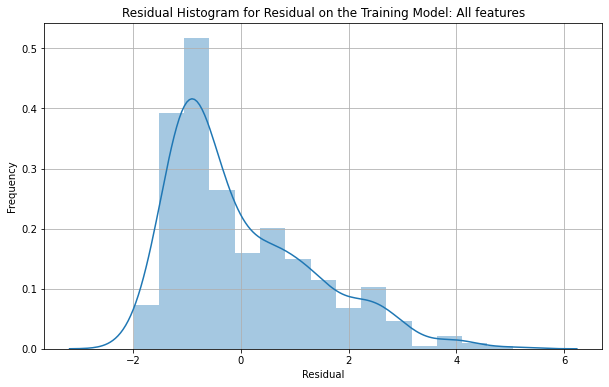

In [39]:
histograms(multi_model_all_other, 'Residual on the Training Model: All features')

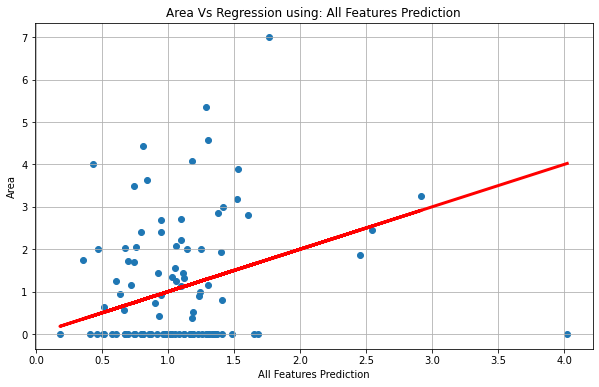

In [40]:
scatters(y_predicted_all, y_test_all, y_predicted_all, 'All Features Prediction')

### Comments:

- The model with all the variables performed better than the variable using only `rain` & `wind` to predict the target variable `area`.
- Still some good next step could be to identify which features are relevant to the model and obtain a regression using those features.
- Since we do not have a lot of data a 80/20 split was used for the training/testing set.
- In both cases the MSE (rain & wind model Vs all features model)is lower in the testing set than the training set. Which might indicate.
- Future steps on this analysis/model might be:
    - Looking in more detail to the outliers that we still have in the data (since they might be hight leverage points)
    - Feature selection is a step that should be part of the analysis (contribution of each variable, correlation among them, etc.)